# Project: tmdb-movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

During this report I will investigate dataset of 10,000 movies that have been retirved from movie database (TMDB). The dataset show different information regarding the movies listed in the file such as production company, cast of the movie, allocated budget and the total revenue of the movie. we will study the change in popularity of movie generas through years in total movie revenue and movies rating and direction of production companies to produce more movies from same generas. 

**so basically I will ask two main questions:**

**1- What were the most popular genres through period from 1965 to 2015 ?**

**2- Do production companies direct its budget toward popular genres ?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check for number of dataframe columns and rows
df.shape

(10866, 21)

In [4]:
# check for data frame information and check for missing data and datatype of each coloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for values of each coloumn and its validity.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#check for duplicated rows in the dataframe
df.duplicated().sum()

1

In [7]:
#check for unique values in each dataframe
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#check for missing data in each coloumn.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

**Through data wrangling process we have noticed the following:** 
1. some coloumns will be removed as it will not be used in the analysis steps.
2. remove of duplicated rows and rows that have missing data.
3. Change the zero values in both budget_adj and revenue adj columns.
4. Make a representatative for the each decade by changing the release_year value to middle of decade year. (this will make the graph look nicer)  
5. values of coloumns "genera" and "production companies" are seperated by "|" charcter and need to be seperated to easly iterate through it.

**In the following cell I will remove unneeded coloumns**

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
dropped_coloumns = ["id", "imdb_id", "budget", "revenue", 
                    "original_title", "cast", "homepage", "director", "tagline",
                   "keywords","overview", "runtime"]
df.drop(columns = dropped_coloumns, inplace = True)

In [10]:
df.head()

,popularity,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Remove of duplicated and null value columns**

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.dropna(inplace = True)

In [13]:
df.shape

(9826, 9)

In [14]:
df.isnull().sum().sum()

0

**Change of missing datas in Budget_adj and revenue_adj columns**

Check for missing or zero values in both budget_adj and revenue_adj columns

In [15]:
df[(df["budget_adj"]==0) | (df["revenue_adj"]==0)].shape

(6018, 9)

This is alot of data that missing and one option is removing it. the other method that can be used is replacing the zero values with mean value. the number of zero values are almost two third of data base and removing them will greatly affect the analysis. using general mean from the whole data frame will also affect the analysis. 
so i am going to generate a mean valiable for each year and change the zero value of that year with the mean variable. by that data will not be affected greatly by great variation espcially in the difference in budget and revenue value from decades to onther. 



In [16]:
#as example, I will check the amount of zero values in budget column in 2015
df[(df["budget_adj"] == 0) & (df["release_year"] == 2015)].shape

(357, 9)

In [17]:
#Then I will check the data values in 2015. as it shown there is alot of zero values in their. 
df.loc[df["release_year"] == 2015,"budget_adj"]

0      1.379999e+08
1      1.379999e+08
2      1.012000e+08
3      1.839999e+08
4      1.747999e+08
           ...     
618    0.000000e+00
619    0.000000e+00
621    0.000000e+00
624    0.000000e+00
625    0.000000e+00
Name: budget_adj, Length: 564, dtype: float64

In [18]:
#next I will determine the mean value for future reference. 
mean = df.loc[df["release_year"] == 2015,"budget_adj"].mean()
print(mean)

12384022.480888234


In [19]:
# I will define a function that will iterate through two columns of interest and change 
#zeros to the mean value of each year
def zero_tomean(df,column):
    '''The function work to get the mean value of required column directed by the value 
    of release year that are ranged from 1960 , 2015. the mean value is then will be 
    used to replace zero value using .loc method. the function return after that the 
    adjusted dataframe '''
    for i in range(1960,2016):
        mean = df.loc[df["release_year"] == i,column].mean()
        condition = (df[column]==0)&(df["release_year"]==i)
        df.loc[condition,column] = mean
    return df

In [20]:
#application of new function on budget_adj column and recheck of zero values.
zero_tomean(df,"budget_adj")
df[df["budget_adj"] == 0].shape

(0, 9)

In [21]:
#application of new function on revenue_adj column and recheck of zero values.
zero_tomean(df,"revenue_adj")
df[df["revenue_adj"] == 0].shape

(0, 9)

In [22]:
#check change of zero values in budget adj column with mean value, comparing size with 
#size of filter when it was zero 
df[(df["budget_adj"] == mean) & (df["release_year"] == 2015)].shape

(357, 9)

**seperation of values of "genres" and " production_companies" columns.**

In [23]:
df["genres"] = df["genres"].str.split("|")

In [24]:
df = df.explode("genres")

In [25]:
df["production_companies"] = df["production_companies"].str.split("|")

In [26]:
df = df.explode("production_companies")

In [27]:
df.shape

(59096, 9)

**Change of "release_year" values to middle decade year for simplification of analysis.**

In [28]:
def change_values(df,value):
    ''' The function work in changing the release year value to a representative value of 
    each decade. it take the value of one year in the data frame and iterate through it to replace 
    the whole decade with only one value.'''
    x = value
    list_values = list(range(x-9, x + 1))
    df.replace({"release_year" : list_values}, {"release_year" : x-4},inplace = True)
    return df

In [29]:
for i in [1969,1979,1989,1999,2009,2019,2029] :
    change_values(df,i)
    
df["release_year"].value_counts()

2005    22145
2015    18810
1995     9597
1985     4919
1975     2213
1965     1412
Name: release_year, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
During this data analysis, I will explore if the popularity of genres affect the choice of companies for allocating movies budget toward specific genres. I will filter popular genres through data provided by checking the amount of movie produced, average movies rate and average revenues. from first question I will nominate the most popular genres in the 60 year span. then I will dive deeper to check high rank production companies and compare there choices of genres through years and their allocated budgets


### Research Question 1: What were the most popular genres through period from 1965 to 2015 ?

**First, I will check the number of each movie according to each genra.** 

Drama              10720
Comedy              7501
Thriller            7193
Action              5721
Romance             3652
Horror              3526
Crime               3419
Adventure           3408
Science Fiction     2729
Family              2238
Fantasy             2028
Mystery             2005
Animation           1252
History              858
Music                737
War                  707
Documentary          606
Western              336
Foreign              237
TV Movie             223
Name: genres, dtype: int64


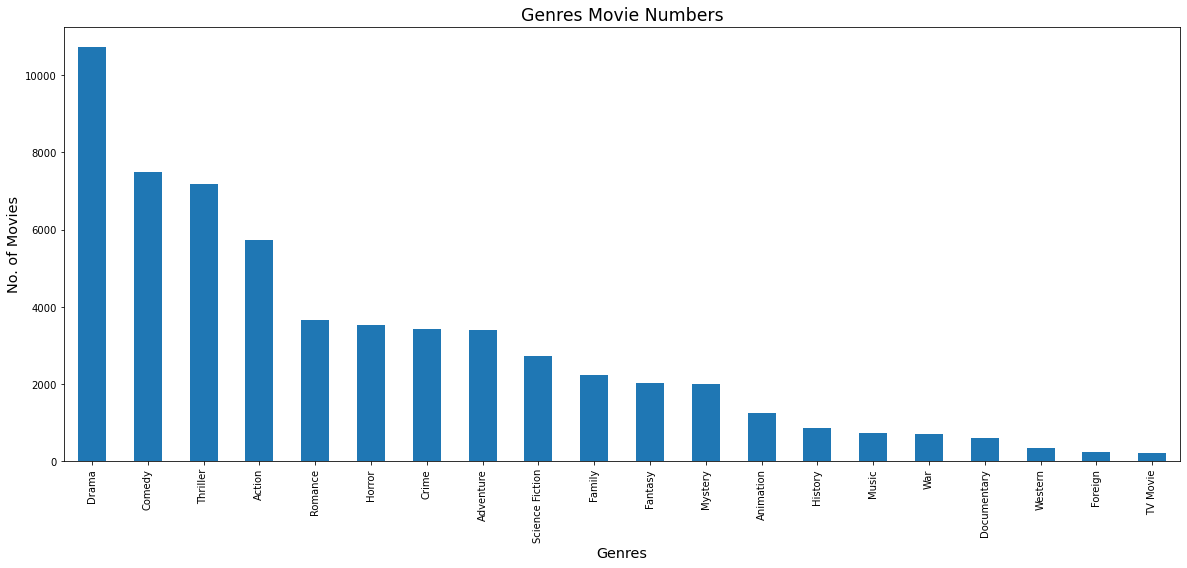

In [30]:
genres_count = df["genres"].value_counts()
print(genres_count)
genres_count.plot.bar(figsize = (20,8))
plt.xlabel('Genres',fontsize='x-large')
plt.ylabel('No. of Movies',fontsize='x-large')
plt.title('Genres Movie Numbers',fontsize='xx-large');

**The most movies produced through 65 years were under genres of (Drama, Comedy, Thriller, Action and Romance)**
**But movies produced through years should be different . though I will analyze the genres that have increased in porduction rate through years.**

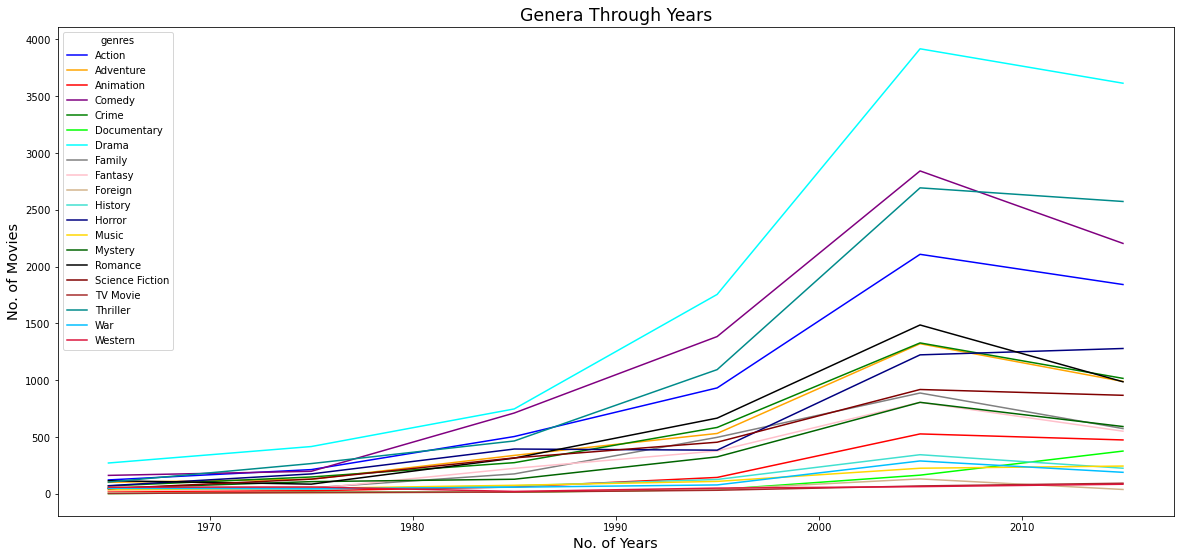

In [31]:
#genereating color pallette list for 20 different genres 
c =['blue','orange','red','purple','green','lime','aqua','grey','pink','tan'
    ,'turquoise','navy','gold','darkgreen','black','maroon','brown','darkcyan','deepskyblue','crimson']
df.groupby("release_year")["genres"].value_counts().unstack().plot(kind = "line", figsize = (20,9), color = c)
plt.xlabel('No. of Years',fontsize='x-large')
plt.ylabel('No. of Movies',fontsize='x-large')
plt.title('Genera Through Years',fontsize='xx-large');


**As it shown in the graph the drama genera is in top of production rate through years, however, Family movies showed a high increase in the 80s and kept in increase till become 2nd most growthing movie genra in 2010s. 
next I will check the mean popularity of each movie genre and there change in popularity through years.**

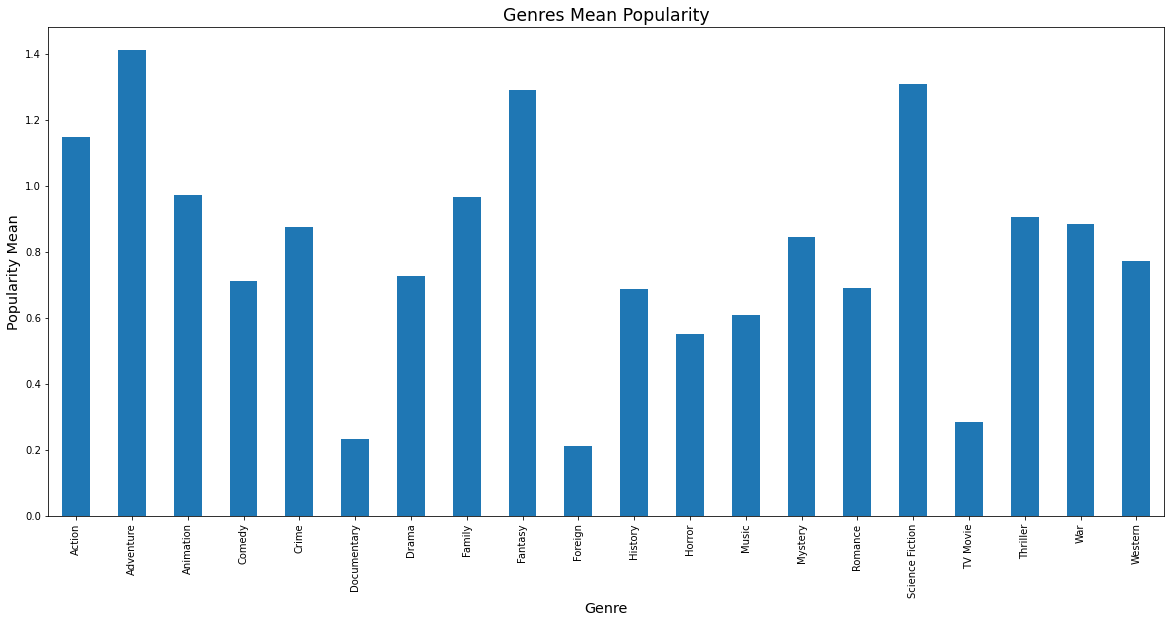

In [32]:
#checking the overall popularity of movie genres.
df.groupby("genres")["popularity"].mean().plot.bar(figsize =(20,9))
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Popularity Mean',fontsize='x-large')
plt.title('Genres Mean Popularity',fontsize='xx-large');

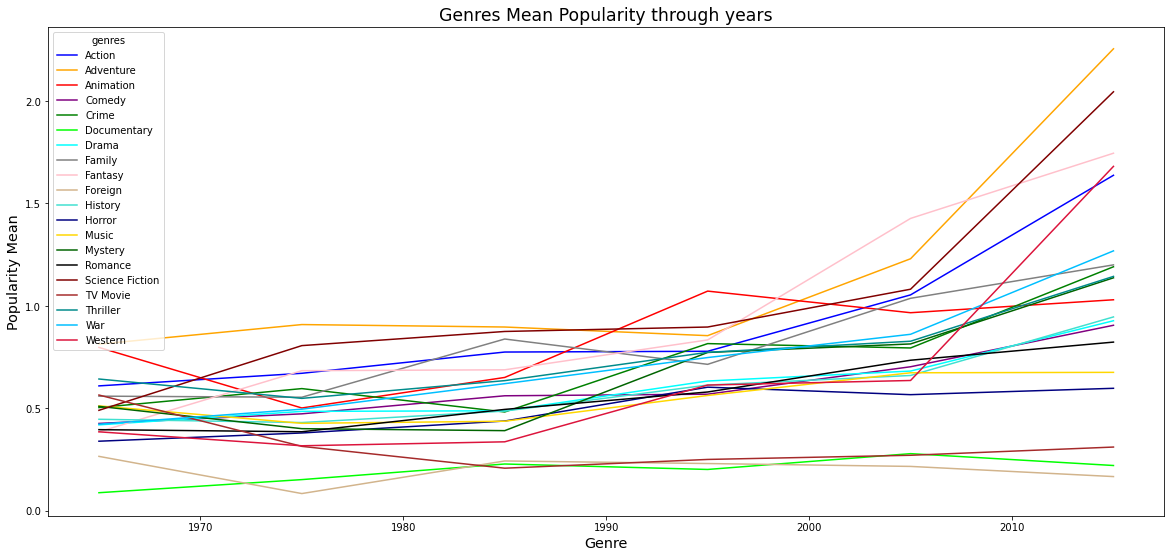

In [33]:
#checking change of movie genres' popularity through years. 
df.groupby(["release_year","genres"])["popularity"].mean().unstack().plot.line(figsize =(20,9), color = c)
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Popularity Mean',fontsize='x-large')
plt.title('Genres Mean Popularity through years',fontsize='xx-large');

**Although of lower number of movies of these genres in the analyzed time period, (Adventure, Sci-fi , Fantacy and Action) have increased in overall popularity through 65 years. Animation have been one of high popularity in the 90s but its popularity decreased in comparison to the other mentioned genres. 
although popularity is a good indicator, but what was the quality of this genres according to the over all audiance.** 

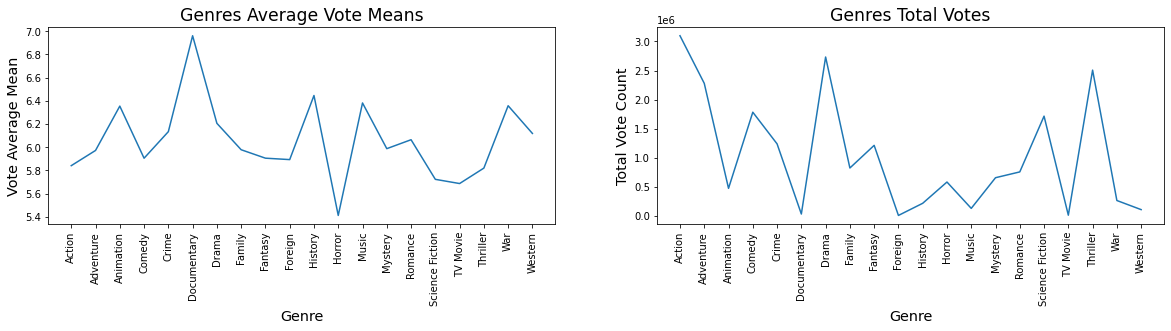

In [34]:
x_label = df.groupby("genres")["vote_average"].sum().index.to_list() # genrating list of x axis labels.
ticks = len(x_label) # lenghth of ticks for x axis labels.
plt.subplot(2,2,1)
df.groupby("genres")["vote_average"].mean().plot.line(figsize = (20,8))
plt.xticks(ticks = range(ticks), labels = x_label, rotation=90)
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Vote Average Mean',fontsize='x-large')
plt.title('Genres Average Vote Means',fontsize='xx-large');
plt.subplot(2,2,2)
df.groupby("genres")["vote_count"].sum().plot.line(figsize = (20,8))
plt.xticks(ticks = range(ticks), labels = x_label, rotation=90)
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Total Vote Count',fontsize='x-large')
plt.title('Genres Total Votes',fontsize='xx-large');

**Documentary, history, music amd war genres have high average vote rating, however , their total number of is significatly low. So, we can't depend on this data alone. in the other hand, Animation, family, comedy, Drama and romance still have good average votes with acceptable number of votes.Action, Thrill and adventure are suffering from the low quality movies that affect their rating despite their high voting count.**

**Finally, I will survay the overall and mean revenue of each Genre in general and through out the 65 years.**

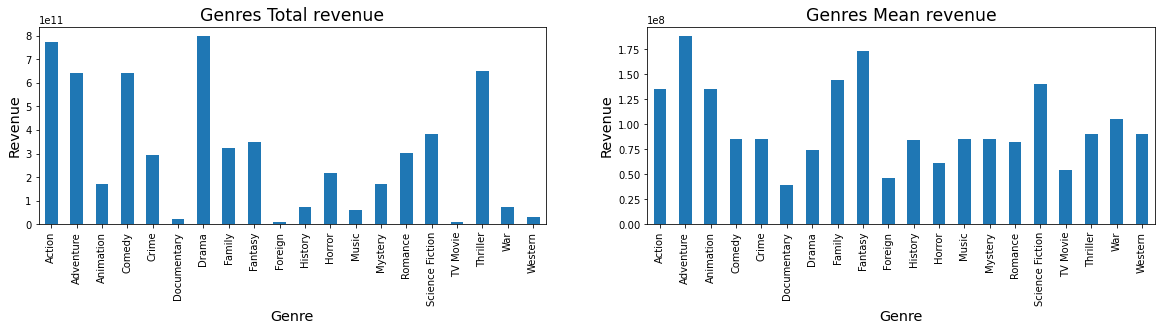

In [35]:
plt.subplot(2,2,1)
df.groupby("genres")["revenue_adj"].sum().plot.bar(figsize = (20,8))
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Genres Total revenue',fontsize='xx-large');
plt.subplot(2,2,2)
df.groupby("genres")["revenue_adj"].mean().plot.bar(figsize = (20,8))
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Genres Mean revenue',fontsize='xx-large');

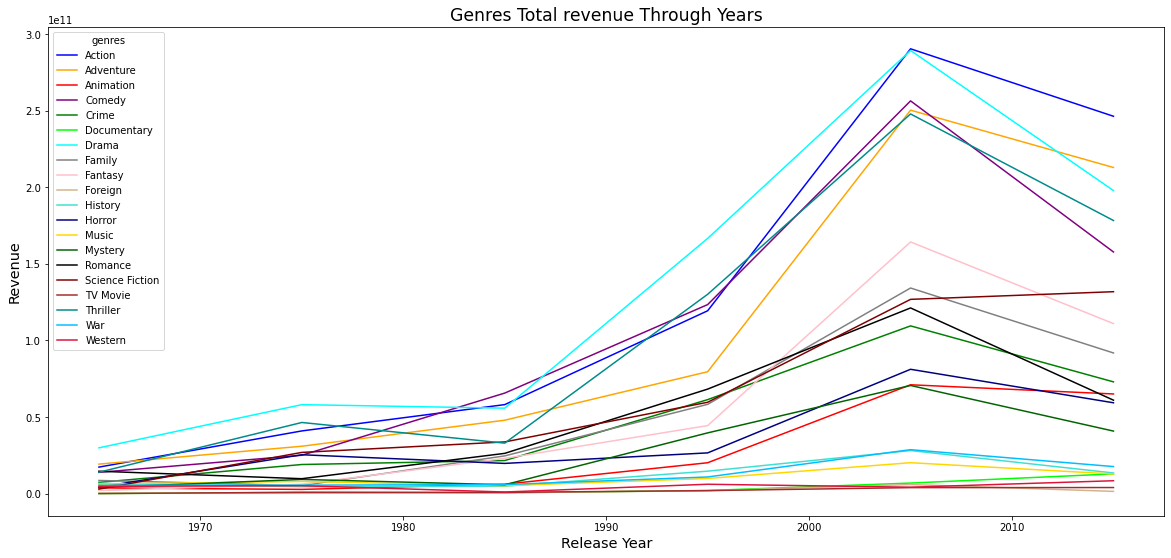

In [36]:
df.groupby(["release_year","genres"])["revenue_adj"].sum().unstack().plot.line(figsize = (20,9), color = c)
plt.xlabel('Release Year',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Genres Total revenue Through Years',fontsize='xx-large');

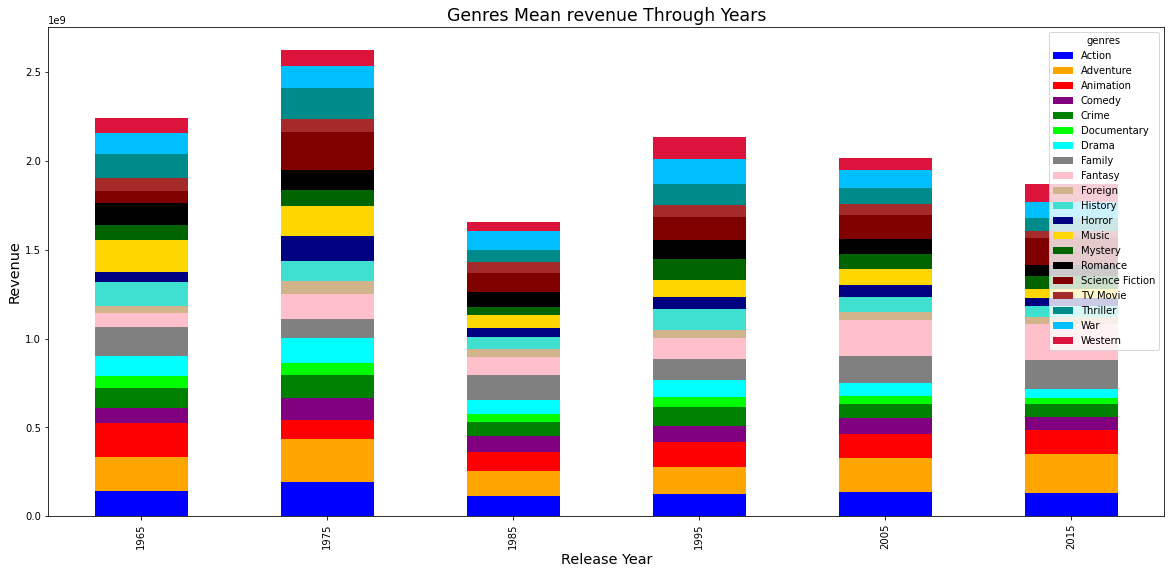

In [49]:
df.groupby(["release_year","genres"])["revenue_adj"].mean().unstack().plot.bar(figsize = (20,9), stacked = True, color = c)
plt.xlabel('Release Year',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Genres Mean revenue Through Years',fontsize='xx-large');

**Although Action is of highly growthing movies of all time. the mean revenue of adventure movies is much higher than action and drama movies. if we look in the bar chart of genres mean revenues through years we can find that adventure movies have the higest revenue through 65 years, coming after it the science fiction and fantacy movies espcially in the last 2 decades.** 



### Research Question 2 : Do production companies direct its budget toward popular genres ?

During this question I will search for the effect of popularity of genres on production companies budget allocation. at first I will fillter the data frame to extract the high production companies.

In [38]:
print("Statistical data of production companies:")
df["production_companies"].value_counts().describe()

Statistical data of production companies:


count    7874.000000
mean        7.505207
std        35.337983
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max      1418.000000
Name: production_companies, dtype: float64

In [39]:
#generation of new coloum based of frequency of production companies usage and generation of new dataframe
# by filteration of high rank production companies.
df["companies_freq"] = df["production_companies"].map(df["production_companies"].value_counts(normalize = True))
df_2 = df.query("companies_freq > 0.010000 ")
df_2.groupby("production_companies")["companies_freq"].value_counts()

production_companies                    companies_freq
Columbia Pictures                       0.012624           746
Paramount Pictures                      0.019392          1146
Twentieth Century Fox Film Corporation  0.013808           816
Universal Pictures                      0.023250          1374
Walt Disney Pictures                    0.011507           680
Warner Bros.                            0.023995          1418
Name: companies_freq, dtype: int64

I have filtered the production companies for the companies that cover more than 80% movies proudced in the provided data. now I will numbers of produced movies by each company through 65 year period to identifiy change in production behavior of each company. 

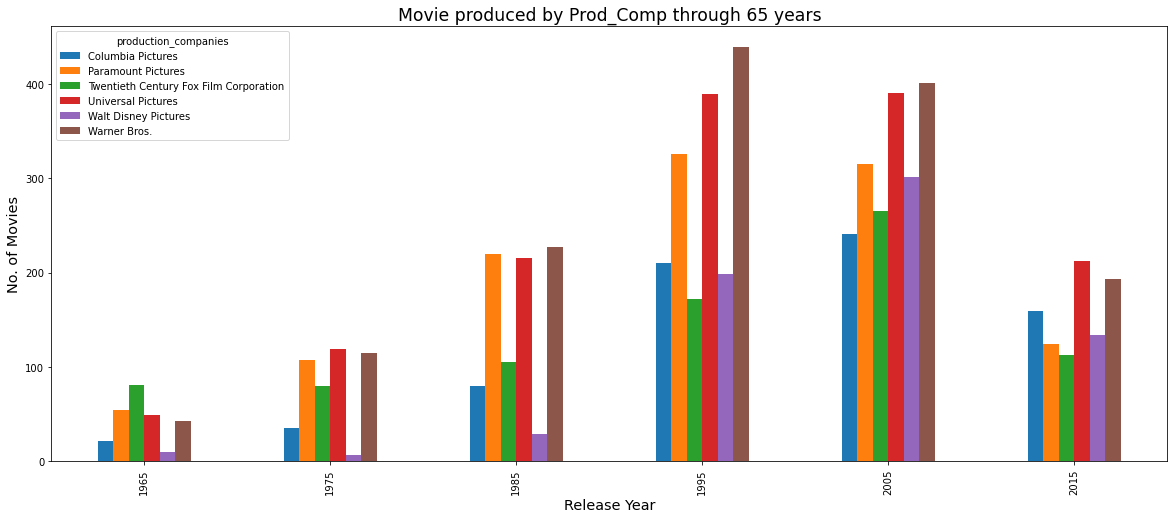

In [40]:
prod_years = df_2.groupby("release_year")["production_companies"].value_counts().unstack()
prod_years.plot(kind = "bar", figsize = (20,8))
plt.xlabel('Release Year',fontsize='x-large')
plt.ylabel('No. of Movies',fontsize='x-large')
plt.title('Movie produced by Prod_Comp through 65 years',fontsize='xx-large');

**20th century Fox company was one of higher movies in 60s but Warner Bros and Universal pictures were in tight race through decades and incresing its production every year. in the same, Walt Disney, paramount and columbia pictures were increasing its movie production in steady pace.**

**Next I will check for the mean value of both allocated budget and gained revenue for each company through years**

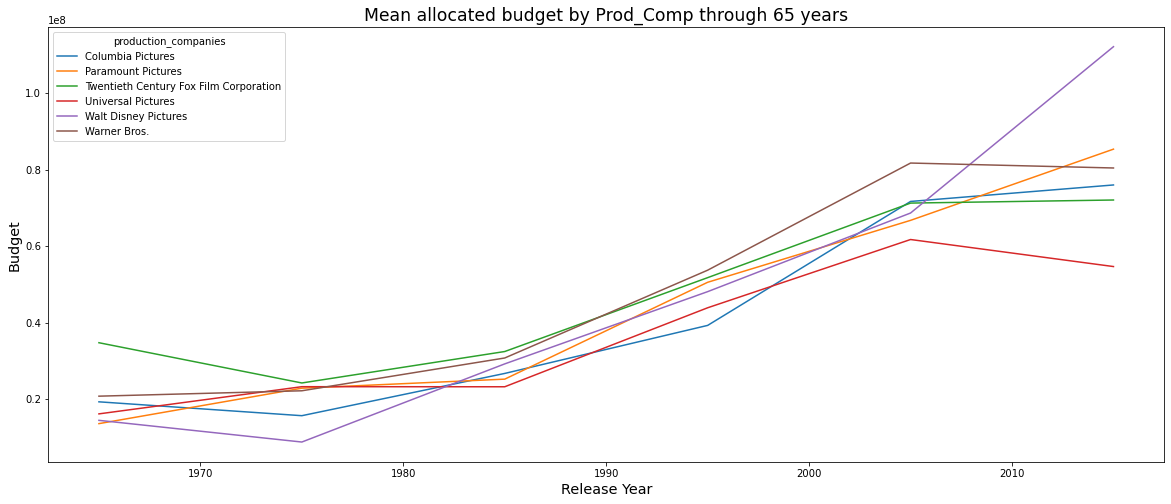

In [41]:
prod_bud = df_2.groupby(["release_year","production_companies"])["budget_adj"].mean().unstack()
prod_bud.plot(kind = "line", figsize = (20,8))
plt.xlabel('Release Year',fontsize='x-large')
plt.ylabel('Budget',fontsize='x-large')
plt.title('Mean allocated budget by Prod_Comp through 65 years',fontsize='xx-large');

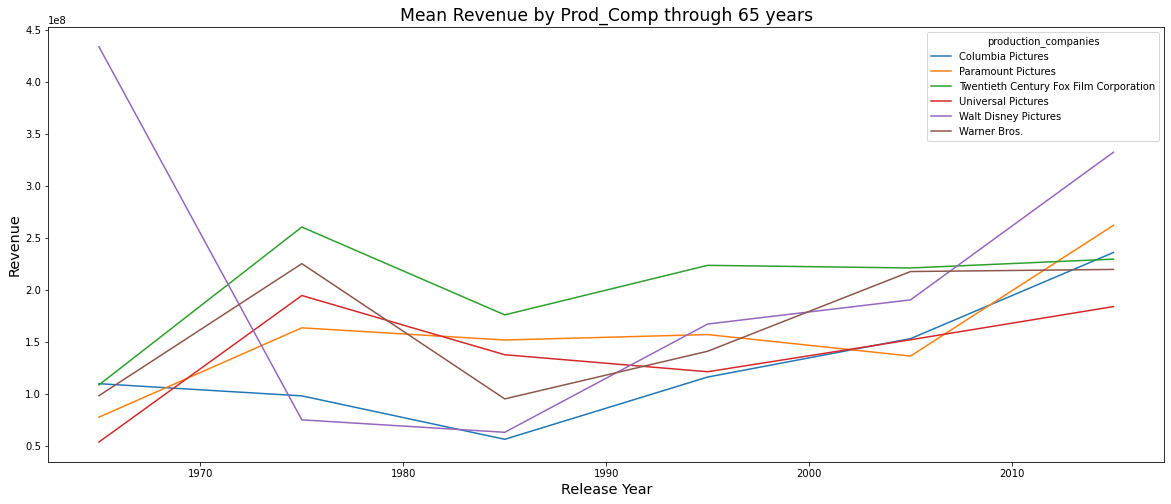

In [42]:
prod_rev = df_2.groupby(["release_year","production_companies"])["revenue_adj"].mean().unstack()
prod_rev.plot(kind = "line", figsize = (20,8))
plt.xlabel('Release Year',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Mean Revenue by Prod_Comp through 65 years',fontsize='xx-large');

**Walt Disney is currently the higest invester in the industy, followed by Paramonunt, they are also one of the current higher revenue companies after 20th century were in top for more than 40 years.** 

**Now I will check the most produced movie genres by the companies after filteration of dataframe by high popular selected genres. and I will also check there most invested generes and their highest revenue ones.**

In [43]:
high_interest_genres = ["Action","Adventure","Comedy","Drama","Thriller","Fantasy", "Family", 
                        "Animation","Science Fiction"]
df_2 = df_2.query("genres == @high_interest_genres")

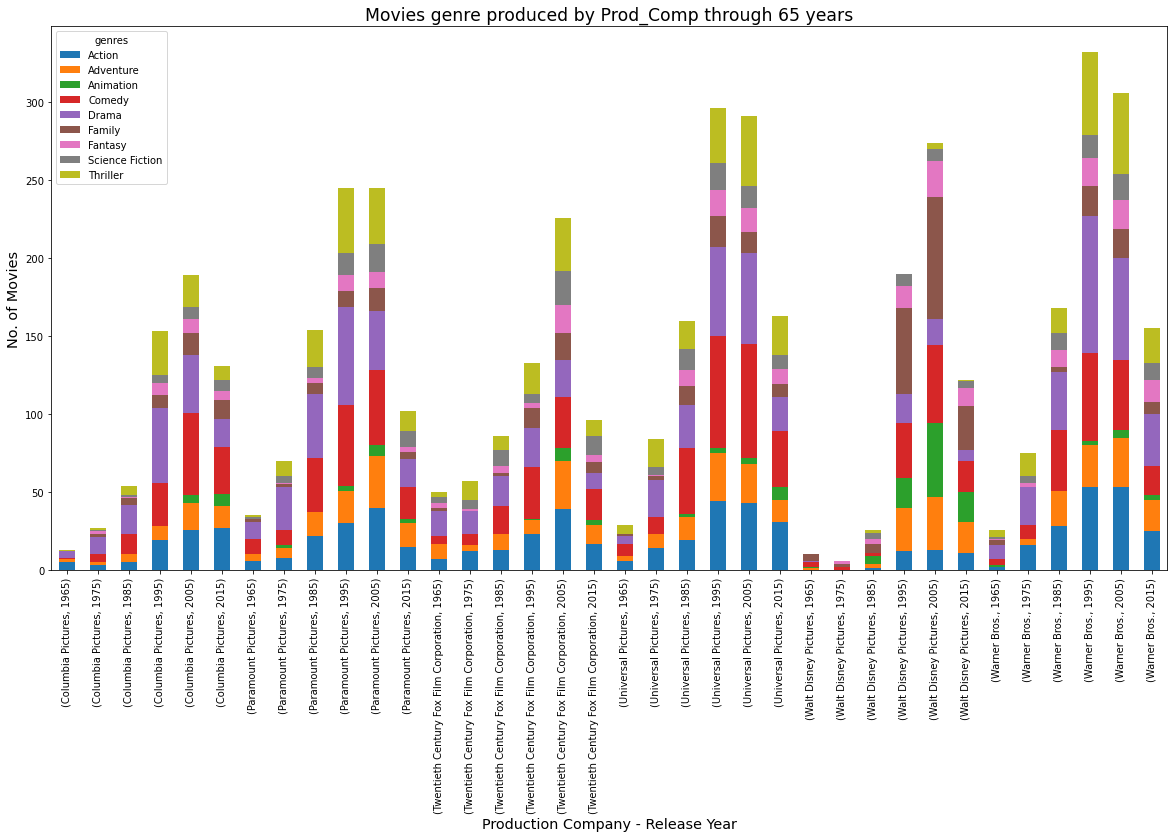

In [44]:
prod_gen = df_2.groupby(["production_companies","release_year"])["genres"].value_counts().unstack()
prod_gen.plot(kind = "bar",figsize =(20,10),stacked = True)
plt.xlabel('Production Company - Release Year',fontsize='x-large')
plt.ylabel('No. of Movies',fontsize='x-large')
plt.title('Movies genre produced by Prod_Comp through 65 years',fontsize='xx-large');

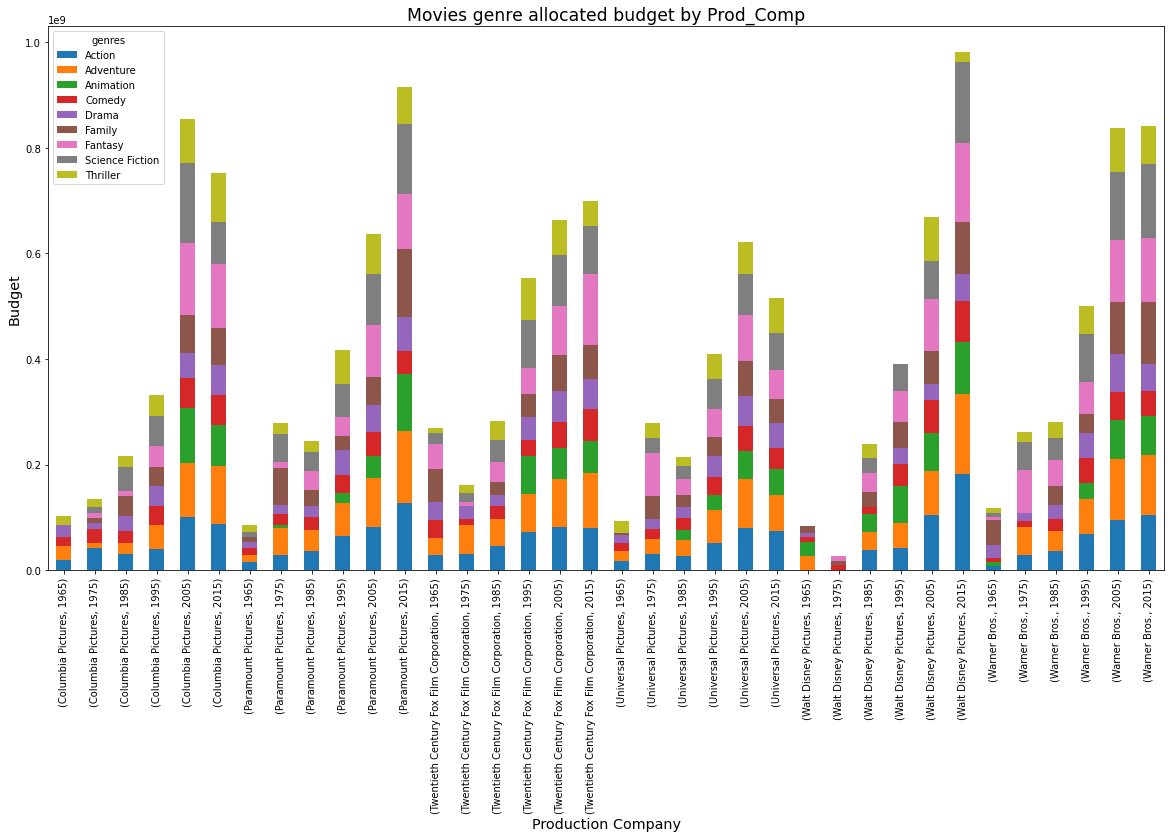

In [45]:
prod_gen_bud = df_2.groupby(["production_companies","release_year","genres"])["budget_adj"].mean().unstack()
prod_gen_bud.plot(kind="bar", figsize=(20,10), stacked = True)
plt.xlabel('Production Company',fontsize='x-large')
plt.ylabel('Budget',fontsize='x-large')
plt.title('Movies genre allocated budget by Prod_Comp',fontsize='xx-large');

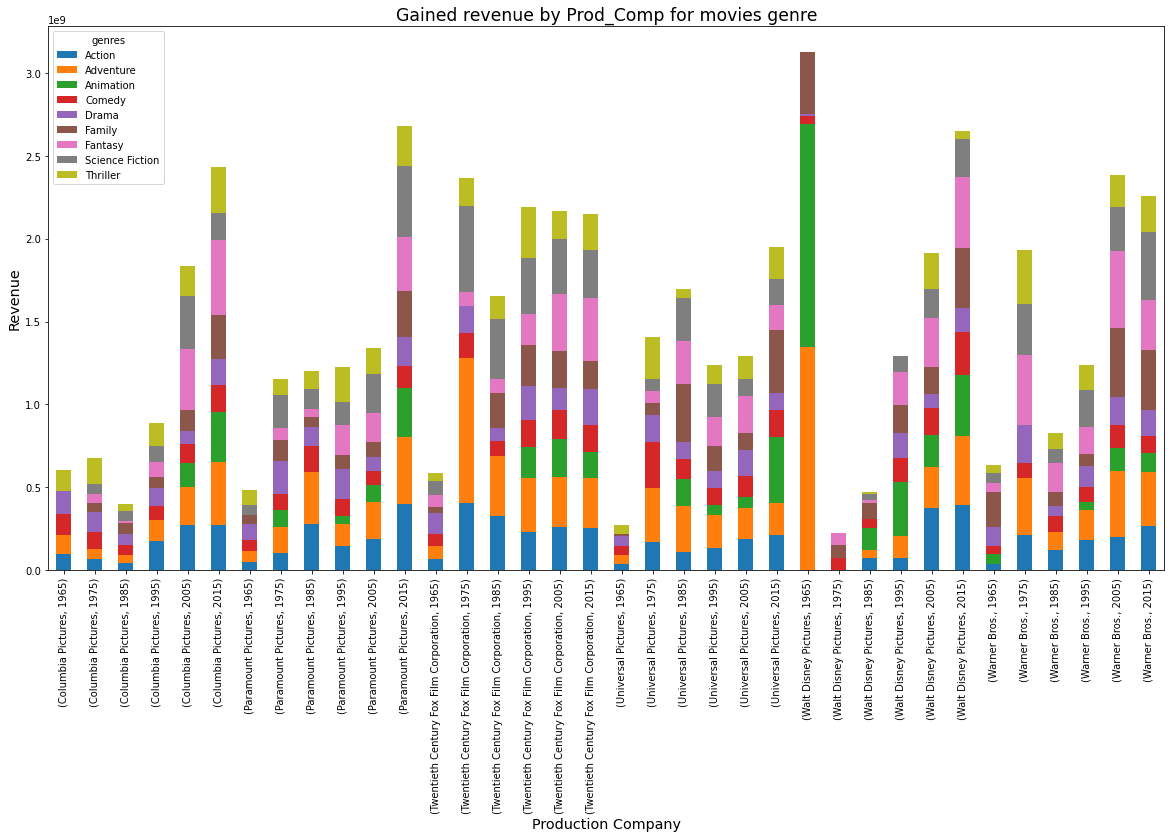

In [46]:
prod_gen_rev = df_2.groupby(["production_companies","release_year","genres"])["revenue_adj"].mean().unstack()
prod_gen_rev.plot(kind="bar", figsize=(20,10), stacked = True)
plt.xlabel('Production Company',fontsize='x-large')
plt.ylabel('Revenue',fontsize='x-large')
plt.title('Gained revenue by Prod_Comp for movies genre',fontsize='xx-large');


<a id='conclusions'></a>
## Conclusions
In question 1: from the analysis of genres performance through this 65 year. we can nominate those genres as highest popular movie genres during the last 6 decades. 
("Action","Adventure","Comedy","Drama","Thriller","Fantasy", "Family", "Animation”, “Science Fiction")

Question 2: From charts, there are a lot of data that can be processed, but for example, I have noticed that Walt Disney produced a lot of family movies during the 90s and 2000, They haven't gained a lot of money from it, and they moved for adventure and action movies more. in the other hand, Warner’s brothers’ little family movies in 2000s and 2010s but their revenue were great. 
in the first Walt Disney worked in family movies when they were not that popular. vice versa, Warner Bros. started working in family movies when they start gaining popularity.

In my opinion, the effect of genres popularity in the production of film companies has feedback mechanism. The success of some companies in certain movie genre can increase its popularity. however, popular genres attract movie makers to produce more of the same genres to increase the profit like in case of Warner Bros. and universal 2010s with family genre. and hence, these movies attract viewers, and by that increase profitability of the movie. a more research can be done by segmenting the data from each production company and compare the profit of each genre with the quality of each work and its popularity in different decades. 


## Limitations
I had some troubles regarding the data summsion after spliting the values of genre and production compnies. the summision of the data increased than real values and causing untrue results in visualization and analysis. 